In [77]:
import re
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import matplotlib.pyplot as plt

# Task 4

In [78]:
# Load output files
# task 4 - part 2 results
task_4_2_path = "results/juliap_job_4977908.out"


# task 4 - part 3 results
with open("results/juliap2_job_4977909.out", "r") as f:
    out2 = f.readlines()

In [79]:
def parse_file_to_dataframe(file_path, column_names):
    
    expected_num_cols = len(column_names)
    parsed_data = []

    with open(file_path, 'r') as f:
        for line in f:
            parts = [p.strip() for p in line.strip().split(',')]
            if len(parts) != expected_num_cols:
                continue  # Skip lines that don't match expected column count

            # Try to convert each value to int or float, otherwise keep as string
            def convert(val):
                try:
                    if '.' in val:
                        return float(val)
                    return int(val)
                except ValueError:
                    return val

            parsed_row = [convert(p) for p in parts]
            parsed_data.append(parsed_row)

    return pd.DataFrame(parsed_data, columns=column_names)

## Task 4.2

In [80]:
df_task4_np = parse_file_to_dataframe(task_4_2_path, ["n", "p", "runtime"])
df_task4_np_min = df_task4_np.groupby(["n", "p"]).min()

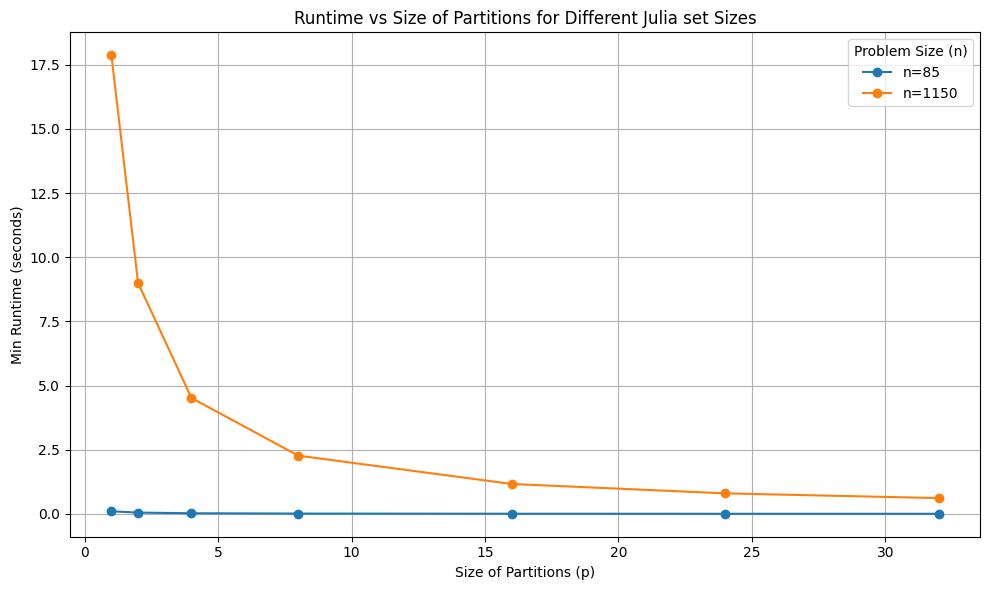

In [81]:

plt.figure(figsize=(10, 6))

# Plot a line for each problem size 'n'
for n_value, group in df_task4_np_min.reset_index().groupby("n"):
    plt.plot(group["p"], group["runtime"], marker='o', label=f"n={n_value}")

plt.xlabel("Size of Partitions (p)")
plt.ylabel("Min Runtime (seconds)")
plt.title("Runtime vs Size of Partitions for Different Julia set Sizes")
plt.legend(title="Problem Size (n)")
plt.grid(True)
#plt.xscale("log", base=2)  # Optional: log scale for clearer spacing if p is powers of 2
#plt.yscale("log")  # Optional: log scale to highlight improvements
plt.tight_layout()
plt.show()

## Task 4.3

In [82]:
# 4.3 requires special handling to load as the first column is a string
parsed_data = []
for row in out2:
    parts = row.strip().split(",")
    schedule = ",".join(parts[:-3])[1:-1]  # Remove surrounding quotes from schedule
    n = int(parts[-3])
    p = int(parts[-2])
    runtime = float(parts[-1])
    parsed_data.append([schedule, n, p, runtime])

# Create DataFrame
df_task4_schedule = pd.DataFrame(parsed_data, columns=["schedule", "n", "p", "runtime"])
df_task4_schedule_min = df_task4_schedule.groupby(["schedule", "n", "p"]).min().reset_index()

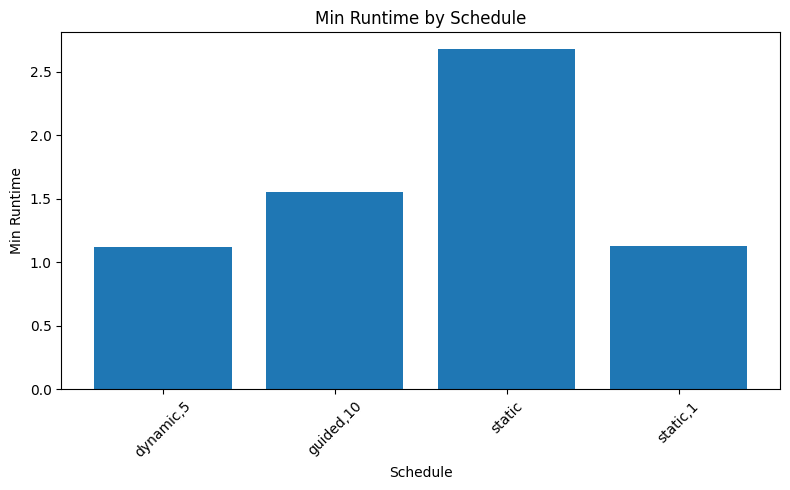

In [83]:
plt.figure(figsize=(8, 5))
plt.bar(df_task4_schedule_min["schedule"], df_task4_schedule_min["runtime"])

plt.xlabel("Schedule")
plt.ylabel("Min Runtime")
plt.title("Min Runtime by Schedule")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Task 5

In [84]:
task_5_2_path = "results/filter_strong_job_4977910.out"
task_5_3_path = "results/filter_weak_job_4977911.out"

In [85]:
# Load output files
# task 5 - part 2 results
df_task5_strong = parse_file_to_dataframe(task_5_2_path, ["2000", "p", "r", "runtime"])

# task 5 - part 3 results
df_task5_weak = parse_file_to_dataframe(task_5_3_path, ["2000", "p", "r", "runtime"])

## Task 5.2 (Strong scaling)

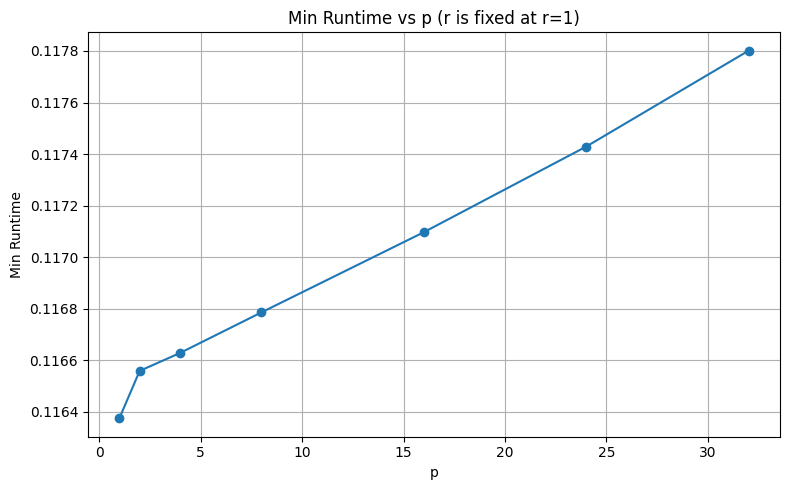

In [86]:
df_task5_strong_min = df_task5_strong.groupby(["2000", "p", "r"]).min().reset_index()

# Assuming df_task5_strong has columns: 'p' and 'runtime'
plt.figure(figsize=(8, 5))
plt.plot(df_task5_strong_min['p'], df_task5_strong_min['runtime'], marker='o')
plt.title('Min Runtime vs p (r is fixed at r=1)')
plt.xlabel('p')
plt.ylabel('Min Runtime')
plt.grid(True)
plt.tight_layout()
plt.show()

## Task 5.3 (Weak Scaling)

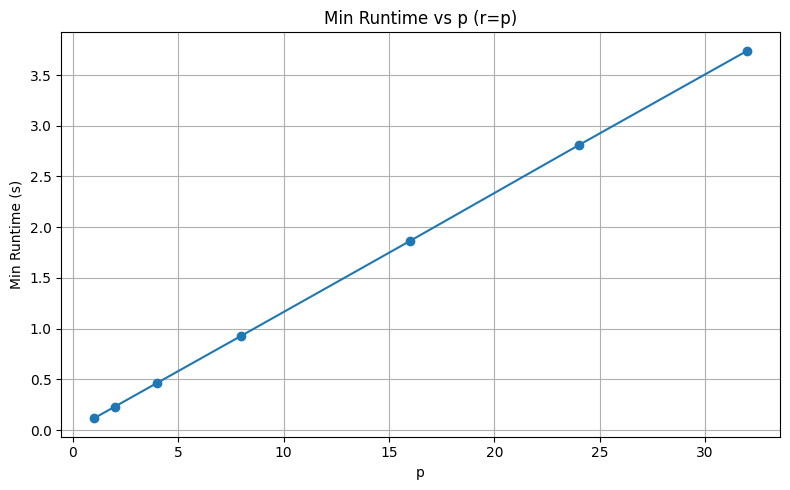

In [87]:
df_task5_weak_min = df_task5_weak.groupby(["2000", "p", "r"]).min().reset_index()

# Assuming df_task5_strong has columns: 'p' and 'runtime'
plt.figure(figsize=(8, 5))
plt.plot(df_task5_weak_min['p'], df_task5_weak_min['runtime'], marker='o')
plt.title('Min Runtime vs p (r=p)')
plt.xlabel('p')
plt.ylabel('Min Runtime (s)')
plt.grid(True)
plt.tight_layout()
plt.show()